## Análisis del alcance actual del servicio de acceso a internet a hogares y personas por provincias 

Como la hoja 'Penetracion-totales' no está discriminada por provincias, combinaré las hojas 'Penetración-hogares' y 'Penetración-poblacion'

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r'Datasets/Penetracion-hogares.csv')

In [3]:
df2 = pd.read_csv(r'Datasets/Penetración-poblacion.csv')

In [4]:
df1.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [5]:
df2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [6]:
#Combino los df en base a las tres primeras columnas ya que son las mismas.
df = pd.merge(df1, df2[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab']], on=['Año', 'Trimestre', 'Provincia'])
df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2024,2,Buenos Aires,79.840000,27.430000
1,2024,2,Capital Federal,116.370000,47.440000
2,2024,2,Catamarca,68.810000,17.500000
3,2024,2,Chaco,44.060000,11.780000
4,2024,2,Chubut,86.330000,26.460000
...,...,...,...,...,...
995,2014,1,La Rioja,16.294105,4.353175
996,2014,1,Mendoza,31.913123,8.933318
997,2014,1,Misiones,23.136539,6.323161
998,2014,1,Neuquén,49.791605,14.882266


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
 4   Accesos por cada 100 hab      1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


No hay valores faltantes, nulos ni duplicados

In [16]:
df.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2018.800000,2.464000,52.794973,15.727248
std,3.021445,1.114426,24.135063,9.240063
min,2014.000000,1.000000,9.513970,2.723000
25%,2016.000000,1.000000,33.957657,9.018188
50%,2019.000000,2.000000,50.133004,13.674812
75%,2021.000000,3.000000,67.010861,20.323973
max,2024.000000,4.000000,124.061394,52.236739


No se observan datos raros, fuera de rango. 

In [7]:
df = df.to_csv('penetracion_hogar_hab_pcia.csv', index=False)

### Vamos a ver ahora la evolución de los accesos durante esta última década por provincias

In [48]:
#Agrupo por provincias y años para tener los totales por año de accesos por cada 100 hogares y accesos por cada 100 hab
df_total_por_ano = df.groupby(['Provincia', 'Año'])[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].sum().reset_index()

df_total_por_ano

,Provincia,Año,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,Buenos Aires,2014,222.480566,67.765033
1,Buenos Aires,2015,229.153793,69.798289
2,Buenos Aires,2016,238.054317,72.507713
3,Buenos Aires,2017,228.085145,73.459532
4,Buenos Aires,2018,254.451892,82.672156
...,...,...,...,...
259,Tucumán,2020,207.640218,51.434422
260,Tucumán,2021,220.309155,54.571455
261,Tucumán,2022,238.880032,59.166991
262,Tucumán,2023,243.390000,60.290000


Graficamos evolución de accesos a traves de los años por provincias con líneas facetadas ya que son muchas y en un solo gráfico queda todo muy junto y no se entiende.

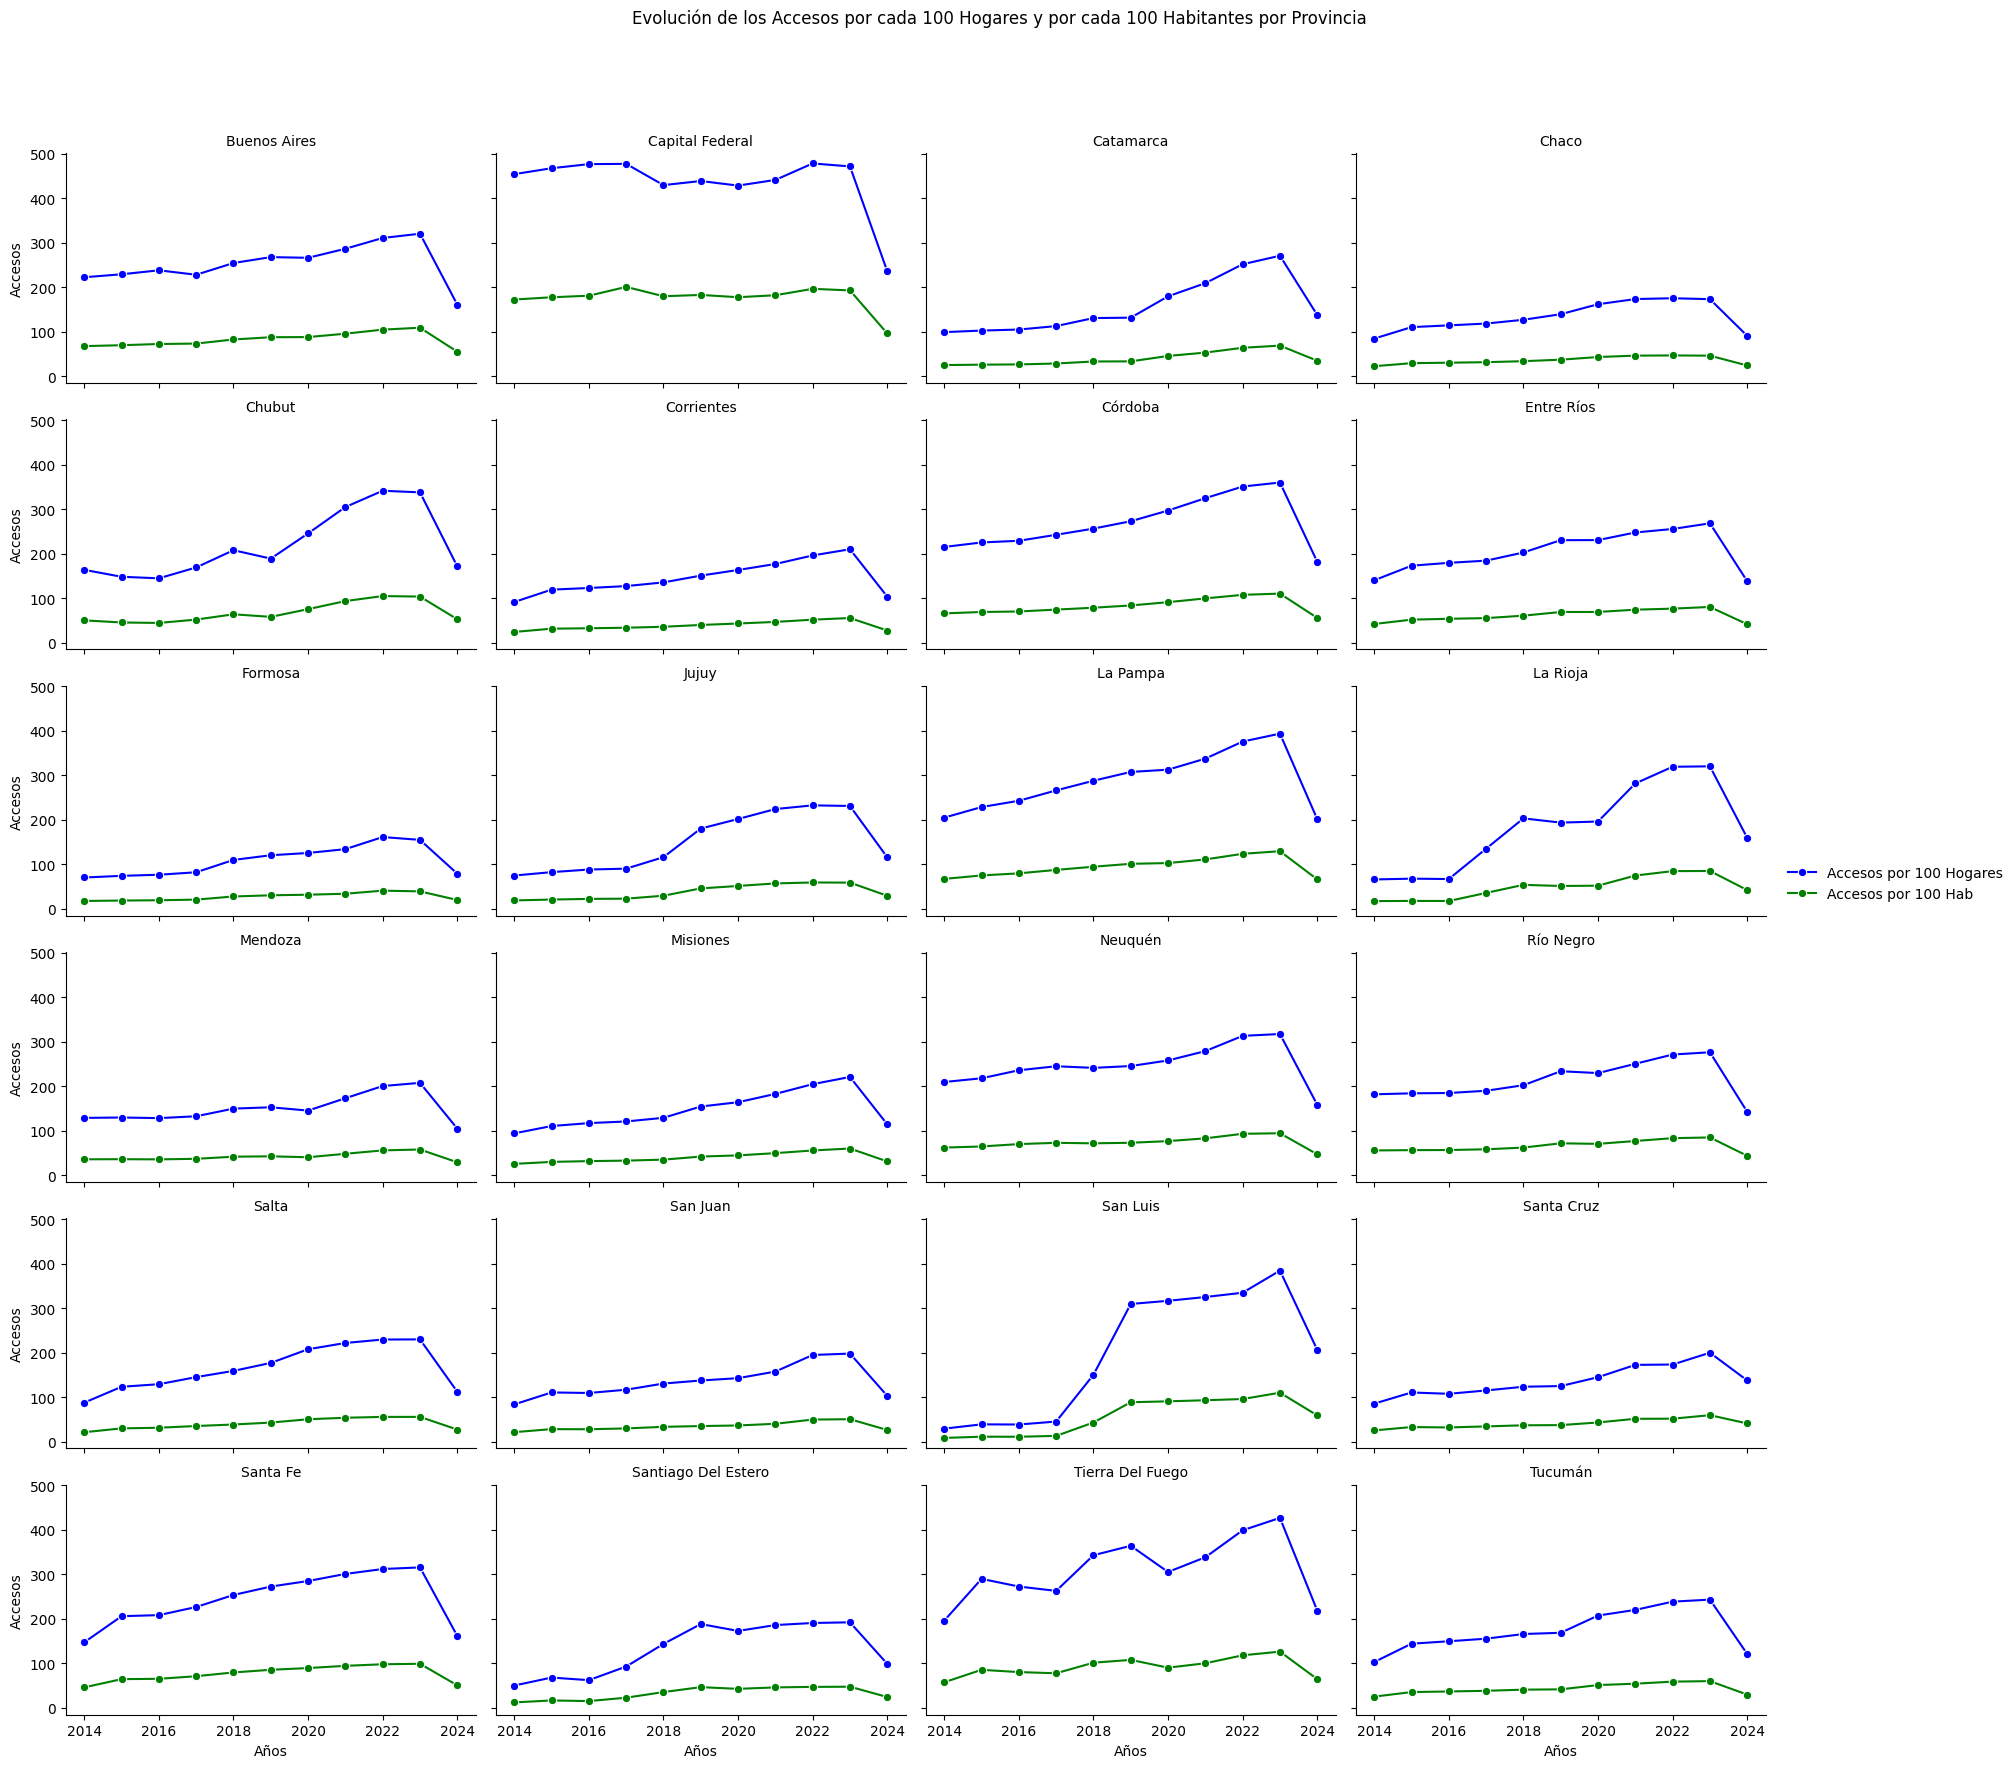

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfico de líneas facetadas por provincia
g = sns.FacetGrid(df_total_por_ano, col='Provincia', col_wrap=4, height=3, aspect=1.5)

#Accesos por cada 100 hogares
g.map(sns.lineplot, 'Año', 'Accesos por cada 100 hogares', marker='o', color='blue', label='Accesos por 100 Hogares')

#Accesos por cada 100 habitantes
g.map(sns.lineplot, 'Año', 'Accesos por cada 100 hab', marker='o', color='green', label='Accesos por 100 Hab')

g.set_titles("{col_name}")
g.set_axis_labels('Años', 'Accesos')
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Evolución de los Accesos por cada 100 Hogares y por cada 100 Habitantes por Provincia')

plt.show()


*Observaciones generales:*

*Ambas métricas tienden a aumentar con el tiempo en menor o mayor medida según la provincia, aunque con algunas fluctuaciones.* 

*Los accesos por cada 100 hogares (línea azul) son mayores que los accesos por cada 100 habitantes (línea verde) en todas las provincias. A nivel individual se lo podemos atribuir a la conexión a redes de teléfonos móviles.*

*Algunas provincias tienen un crecimiento mucho más rápido o niveles de acceso más altos en comparación con otras.*

*Cabe destacar la baja pronunciada a nivel país en los accesos en el período 2023-2024. Posiblemente por la crisis económica de ese año.*